# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

I chose to solve the first problem: parallelization of the TSP with MPI libraries (by continent migrations)

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

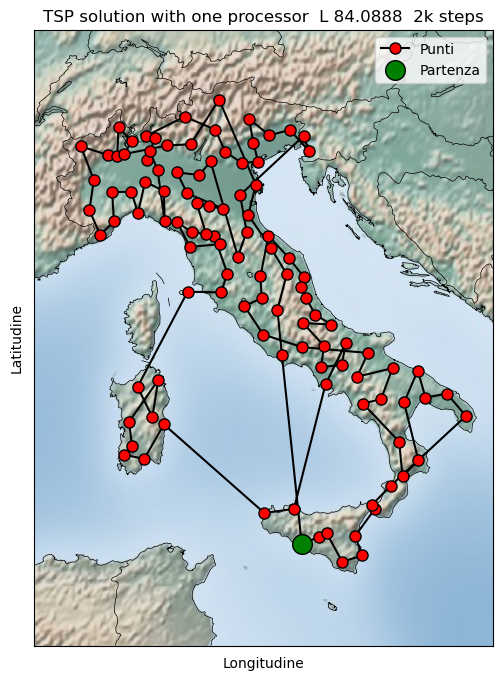

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap

best_len = 84.0888

x, y = np.loadtxt("trip_prov_1p.out", usecols=(1,2), delimiter= "\t", unpack='true')

plt.figure(figsize=(10,8))

m = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 48, llcrnrlon = 6, urcrnrlon = 19, resolution = 'i')

m.shadedrelief()
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)

x_map, y_map = m(x,y)

m.plot(x_map, y_map, marker='o', linestyle='-', color='black', markerfacecolor='red', markersize=8, markeredgewidth=1, label='Punti')

# Evidenzia il punto di partenza
m.scatter(x_map[0], y_map[0], s=200, color='green', edgecolor='black', zorder=10, marker='o', label='Partenza')

# Aggiungi titolo e etichette agli assi
plt.title('TSP solution with one processor  L ' + str(best_len) + '  2k steps')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()

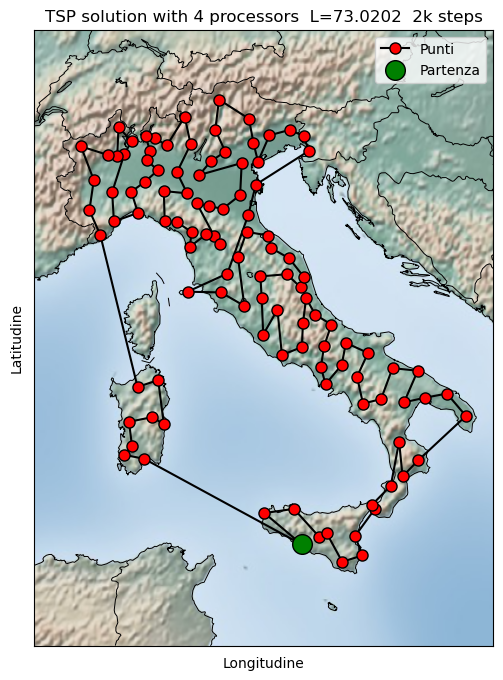

In [35]:
best_len = 73.0202

x, y = np.loadtxt("trip_prov_4p.out", usecols=(1,2), delimiter= "\t", unpack='true')

plt.figure(figsize=(10,8))

m = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 48, llcrnrlon = 6, urcrnrlon = 19, resolution = 'i')

m.shadedrelief()
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=0.7)

x_map, y_map = m(x,y)

m.plot(x_map, y_map, marker='o', linestyle='-', color='black', markerfacecolor='red', markersize=8, markeredgewidth=1, label='Punti')

# Evidenzia il punto di partenza
m.scatter(x_map[0], y_map[0], s=200, color='green', edgecolor='black', zorder=10, marker='o', label='Partenza')

# Aggiungi titolo e etichette agli assi
plt.title('TSP solution with 4 processors  L='+str(best_len) + '  2k steps')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()

In the two maps above it is shown how the best path found is better when four processors are used simultaneously letting them communicate with each other. In fact, with the same amount of steps, the length found by the four processors is more than 10% smaller than the one found by the one processor operating alone. This result is also visible on the map, where is evident that the second follows a cleverer path.

<ipython-input-37-694c11f7a812>:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 300)


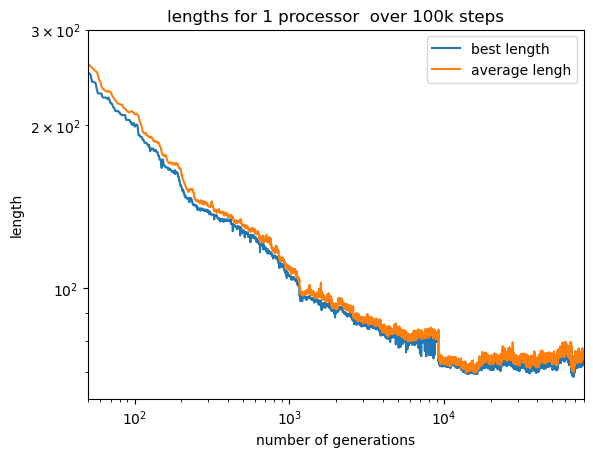

In [37]:
bestL, avL = np.loadtxt("lengths_prov_1p.out", usecols=(0,1), delimiter= "\t", unpack='true')
plt.loglog(bestL, label='best length')
plt.plot(avL, label = 'average lengh')

plt.xlim(50, 80000)
plt.ylim(0, 300)

plt.xlabel("number of generations")
plt.ylabel("length")
plt.legend()
plt.title("lengths for 1 processor  over 100k steps")

plt.show()

In the graph above we can see how at about 50k steps the length reaches a plateu: at that scale parallelizing becomes less effective since multiplying the number of steps for the number of processors does not affect remarkably the best length we find.

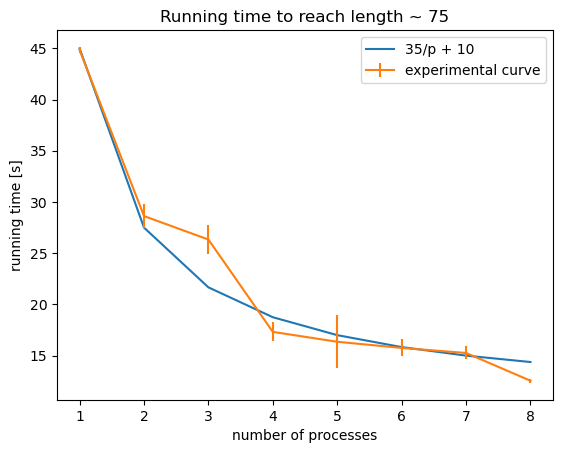

In [64]:
lens, times = np.loadtxt("times_p.out", usecols=(0,1), delimiter= "\t", unpack='true')

nump = np.zeros(8)
for i in range(1,9):
    nump[i-1] = i

av_times=[]
av_times_err=[]

for p in range(0, 8):
    sum = 0.0
    for i in range(0, 5):
        sum = sum + times[p*5 + i]
    
    av_times.append(sum/5)

for p in range(0, 8):
    sum = 0.0
    for i in range(0, 5):
        sum = sum + (times[p*5 + i]-av_times[p])**2
    
    av_times_err.append(np.sqrt(sum/5))

# Define the range of x values
x = np.arange(1, 9)

# Compute the corresponding y values
y = 35 / x +10

# Create the plot
plt.plot(x, y, label = "35/p + 10")

plt.errorbar(nump, av_times, yerr = av_times_err, label = "experimental curve")

plt.xlabel("number of processes")
plt.ylabel("running time [s]")
plt.title("Running time to reach length ~ 75")
plt.legend()

plt.show()


Above a graph that shows how the time spent to reach a certain best length decreases roughly as expected at the increasing of number of processors.

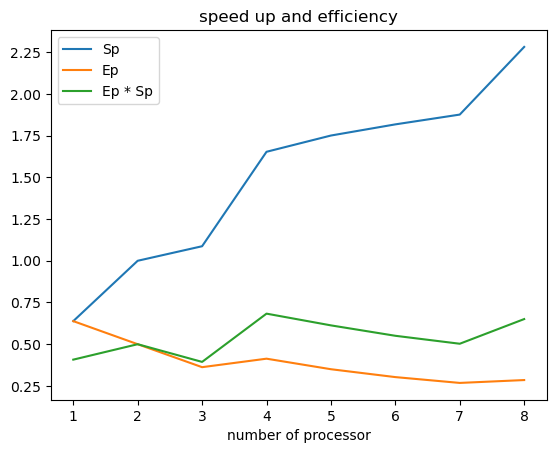

In [75]:
speed_up = []
for i in range(0, 8):
    speed_up.append(av_times[1] / av_times[i])

efficiency = []
for i in range(0, 8):
    efficiency.append(speed_up[i] / (i+1))

SE = []
for i in range(0,8):
    SE.append(efficiency[i]*speed_up[i])

plt.plot(x, speed_up,label="Sp")
plt.plot(x, efficiency,label="Ep")
plt.plot(x, SE, label="Ep * Sp")

plt.title("speed up and efficiency")
plt.xlabel("number of processor")

plt.legend()
plt.show()

Above a graph showing speedup and efficiency as a function of the number of processors: the quantity efficiency * speed-up reaches a maximum at 4 processors, pointing that this would be an ideal number of processors to run the code on.

In [ ]:
pip install basemap

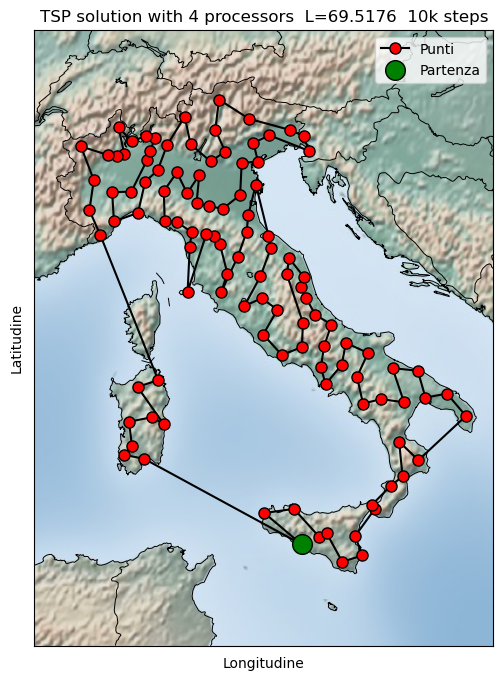

In [38]:
best_len = 69.5176

x, y = np.loadtxt("trip_prov_4p.out", usecols=(1,2), delimiter= "\t", unpack='true')

plt.figure(figsize=(10,8))

m = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 48, llcrnrlon = 6, urcrnrlon = 19, resolution = 'i')

m.shadedrelief()
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=0.7)

x_map, y_map = m(x,y)

m.plot(x_map, y_map, marker='o', linestyle='-', color='black', markerfacecolor='red', markersize=8, markeredgewidth=1, label='Punti')

# Evidenzia il punto di partenza
m.scatter(x_map[0], y_map[0], s=200, color='green', edgecolor='black', zorder=10, marker='o', label='Partenza')

# Aggiungi titolo e etichette agli assi
plt.title('TSP solution with 4 processors  L='+str(best_len) + '  10k steps')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()

The map above shows a good path found with 4 parallel processors working for 10k steps: the 70 barrier has been broken as the best length found is now 69, nice.